0. Import libraries and load data to dataframe

In [1]:
# Import pandas for working with dataframes
import pandas as pd
# Import StandardScaler from sklearn.preprocessing - used for scaling data
from sklearn.preprocessing import StandardScaler
# Import KMeans from sklearn.cluster - used for running KMeans models
from sklearn.cluster import KMeans
# Import silhouette_samples and score from sklearn.metrics - used for calculating silohuettes and their scores 
# (which is used in determining how many clusters to use in KMeans models)
from sklearn.metrics import silhouette_samples, silhouette_score
# Import matplotlib.pyplot - used to make plots and visualizations
import matplotlib.pyplot as plt
# Import matplolib.cm - used as a mix in class for adding colormapping functionality
import matplotlib.cm as cm
# Import numpy - used for math calculations and vectors
import numpy as np
# Import pca from sklearn.decomposition - used for performing primary component analysis
from sklearn.decomposition import PCA

In [2]:
# Read the csv file and assign it to a variable as a dataframe
df = pd.read_csv('als_data.csv')

1. Remove any data that is not relevant to the patient’s ALS condition.

In [3]:
# Displays all columns for viewing purposes
pd.set_option('display.max_columns', None)

In [4]:
# Check the top of the dataframe
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.

In [5]:
# Drop any NaN values from the dataframe

print('Length of df before dropping na: ', len(df))
df = df.dropna()
print('Length of df after dropping na: ', len(df))

Length of df before dropping na:  2223
Length of df after dropping na:  2223


There were no NaN values in this dataframe, but it's good to check anyway.

In [6]:
# Drop the ID column, as it will not be relevant for this analysis
df = df.drop(['ID'], axis = 1)

In [7]:
# Get descriptory statistics for the dataframe
df.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,54.436257,32.993252,23.014800,0.071137,43.127755,29.076923,21.542465,0.049191,30.897301,26.963765,23.164327,0.016868,7.353054,5.558011,4.160875,0.007133,92.030589,81.113360,69.890688,0.047658,147.135403,129.579172,113.429600,0.071178,2.474835,2.345584,2.222855,0.000541,107.152182,103.473864,99.264013,0.017867,78.777996,65.193760,51.981765,0.058417,1.637427,7.160500,5.487113,4.265146,0.006319,6.181287,4.905421,3.047233,0.006883,41.939485,39.467221,36.962426,0.011431,152.141071,144.289024,135.461130,0.038242,5.309942,4.049708,2.493477,0.006163,10.743140,9.703329,7.778228,0.006595,-682.995502,1.800720,285.301844,238.781601,208.382005,4.628367,4.189269,3.857323,0.001744,90.642375,76.973234,65.373819,0.053587,3.910031,3.592668,2.791273,0.002513,143.428880,140.145254,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,44.829577,15.601925,11.231221,0.110889,35.288701,9.593911,7.395303,0.084100,3.164472,2.198824,2.408519,0.011280,2.319538,1.335236,1.354256,0.005070,8.758227,7.245578,8.443662,0.027282,15.754048,12.160938,11.195037,0.033110,0

In [8]:
# Get the correlations between each pair of variables
df.corr()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
Age_mean,1.000000,-0.276195,-0.349024,-0.297121,0.053197,-0.015301,0.049054,0.057733,0.041025,0.038163,-0.130050,-0.189788,-0.142516,-0.058298,-0.030284,-0.024973,-0.002730,-0.010642,0.165844,0.191592,0.169390,0.062786,0.218799,0.286131,0.183931,0.142506,0.005481,0.013110,0.017555,0.046004,0.327372,0.317989,0.258714,0.196450,0.008545,-0.010566,0.006702,0.024142,-0.091505,-0.141916,-0.160119,0.101587,0.053231,0.041418,0.010950,0.086564,-0.168238,0.120487,0.133152,-0.007844,0.132036,0.173512,0.185773,0.179134,-0.013099,-0.034760,-0.041498,-0.057266,0.070984,-0.181186,-0.206245,-0.189124,0.056863,-0.047906,-0.029621,-0.041440,0.039065,-0.055647,-0.054257,-0.034408,0.038895,-0.039550,-0.090055,0.037074,0.002051,0.006589,0.040688,0.144203,0.034911,0.053625,-0.077080,-0.066583,-0.033929,0.012406,-0.071695,-0.055059,-0.055515,0.064244,0.028854,0.005432,-0.039712,0.080449,0.007046,0.071736,0.089325,0.065092,0.036559,-0.001532,0.002561,-0.008615
Albumin_max,-0.276195,1.000000,0.780141,0.596662,0.223350,0.037438,0.113349,0.090439,0.058077,-0.072609,0.091963,0.137417,0.085657,0.008734,0.060325,0.096926,0.032387,0.004965,0.125698,0.066279,-0.028314,0.008282,0.064980,-0.027990,-0.059244,0.010039,0.084957,0.084578,0.071161,-0.074635,-0.009723,-0.005592,0.045570,-0.123900,0.155105,0.286746,0.094279,-0.012157,0.035649,-0.009322,-0.072399,-0.025731,0.098292,0.050303,0.009317,0.026042,0.161496,0.010767,0.026261,-0.018847,-0.028908,-0.001439,-0.023482,-0.033976,-0.041942,0.091769,0.090150,0.094050,-0.059026,0.159079,0.152803,0.102448,-0.044372,0.139818,0.134157,0.091300,-0.008516,0.050458,0.064704,0.062803,-0.116434,-0.003759,0.006648,-0.104745,-0.115375,-0.109240,-0.004157,-0.004223,-0.028865,-0.041060,0.014157,-0.009456,-0.002595,-0.081420,0.056793,0.090280,0.081607,-0.127569,0.051798,0.013677,-0.040877,-0.048029,-0.014803,0.080261,0.057346,0.042903,-0.064183,0.075413,-0.046885,-0.138430
Albumin_median,-0.349024,0.780141,1.000000,0.761269,-0.091822,0.059234,0.153280,0.128122,0.099099,-0.099966,0.101377,0.187458,0.147607,0.000620,0.048049,0.124172,0.080313,-0.014476,0.107236,0.046939,-0.040693,-0.007052,-0.002630,-0.054270,-0.028821,-0.073901,0.114683,0.156109,0.136431,-0.086270,-0.029938,-0.001736,0.049809,-0.144217,0.150450,0.336714,0.128773,-0.053379,0.037558,0.029715,-0.006120,-0.082791,0.110474,0.090986,0.040177,0.010782,0.241774,0.009631,0.026086,0.056898,-0.056251,-0.007101,-0.028485,-0.028484,-0.055227,0.036835,0.042328,0.054505,-0.117044,0.205137,0.238150,0.2028

In [9]:
# Assign the absolute values of the correlations between each pair of variables to "c"
c = df.corr().abs()

# Use unstack on "c" and assign the result to "s"
s= c.unstack()
# Sort the values of "s" with highest at the top and assign them to "so"
so = s.sort_values(ascending = False)

In [10]:
# Print the rows after the correlation values of 1
print(so[103:150])

Hematocrit_min       Hematocrit_median      0.984224
                     Hematocrit_max         0.971646
Hematocrit_max       Hematocrit_min         0.971646
Platelets_min        Platelets_median       0.930895
Platelets_median     Platelets_min          0.930895
mouth_median         mouth_max              0.907506
mouth_max            mouth_median           0.907506
respiratory_min      respiratory_range      0.888012
respiratory_range    respiratory_min        0.888012
Hemoglobin_max       Hemoglobin_median      0.886149
Hemoglobin_median    Hemoglobin_max         0.886149
mouth_median         mouth_min              0.874798
mouth_min            mouth_median           0.874798
ALSFRS_Total_median  ALSFRS_Total_max       0.874428
ALSFRS_Total_max     ALSFRS_Total_median    0.874428
Creatinine_min       Creatinine_median      0.870429
Creatinine_median    Creatinine_min         0.870429
hands_median         hands_max              0.870080
hands_max            hands_median           0.

We can see that there are a lot of highly correlated variables in this data set. Some of them will need to be removed to prevent redundancy that would throw off the analysis. I will be dropping columns that contain "max", "min", or "range" as those seem to be frequently correlated with medians, which I would like to keep.

In [11]:
# Drop the columns containing "max", "min", or "range" and update the df accordingly
df = df[df.columns.drop(list(df.filter(regex = 'max|min|range')))]

In [12]:
# Check the top of the dataframe
df.head()

,Age_mean,ALSFRS_slope,ALSFRS_Total_median,ALT.SGPT._median,AST.SGOT._median,Bicarbonate_median,Blood.Urea.Nitrogen..BUN._median,bp_diastolic_median,bp_systolic_median,Calcium_median,Chloride_median,Creatinine_median,Gender_mean,Glucose_median,hands_median,Hematocrit_median,Hemoglobin_median,leg_median,mouth_median,onset_delta_mean,onset_site_mean,Platelets_median,Potassium_median,pulse_median,respiratory_median,Sodium_median,SubjectID,trunk_median,Urine.Ph_median
0,65,-0.965608,28.0,22.0,27.5,28.0,7.11945,83.0,139.0,2.220550,108.0,79.56,1,4.4955,7.5,43.15,146.0,6.5,3.5,-1023,1,169.0,4.25,68.0,3.0,145.5,533,7.0,6.0
1,48,-0.921717,33.0,13.0,17.0,28.0,4.74630,78.0,132.5,2.170650,102.0,53.04,1,4.9950,6.0,39.60,132.0,7.5,8.0,-341,1,264.0,4.30,76.0,4.0,138.0,649,7.0,5.0
2,38,-0.914787,14.0,20.0,19.0,29.0,4.38120,76.0,110.0,2.295400,106.0,79.56,2,5.1060,1.0,46.20,154.0,3.0,7.0,-1181,1,213.0,4.00,73.0,4.0,143.0,1234,0.0,5.0
3,63,-0.598361,29.0,60.0,40.0,20.0,8.03220,80.0,130.0,2.345300,107.0,61.88,2,4.7730,5.5,43.00,145.0,3.5,12.0,-365,2,233.0,4.20,72.0,3.0,139.0,2492,5.0,6.0
4,63,-0.444039,27.5,26.5,26.5,28.0,4.19865,80.0,130.0,2.257975,104.0,48.62,1,5.7165,6.5,42.85,146.5,2.0,12.0,-1768,2,283.5,3.75,96.0,4.0,140.0,2956,4.0,5.0


Now I'll repeat the process I did to get the correlations on the new dataframe after the redundant columns have been removed.

In [13]:
# Assign the absolute values of the correlations between each pair of variables to "c"
c = df.corr().abs()

# Use unstack on "c" and assign the result to "s"
s = c.unstack()
# Sort the values of "s" with highest at the top and assign them to "so"
so = s.sort_values(ascending = False)

# Print the correlations below 1
print(so[100:120])

Creatinine_median   Hemoglobin_median     0.224936
AST.SGOT._median    Gender_mean           0.219743
Gender_mean         AST.SGOT._median      0.219743
Hemoglobin_median   AST.SGOT._median      0.215535
AST.SGOT._median    Hemoglobin_median     0.215535
onset_site_mean     hands_median          0.211432
hands_median        onset_site_mean       0.211432
Age_mean            Hemoglobin_median     0.206245
Hemoglobin_median   Age_mean              0.206245
trunk_median        Bicarbonate_median    0.194014
Bicarbonate_median  trunk_median          0.194014
mouth_median        Gender_mean           0.191834
Gender_mean         mouth_median          0.191834
Bicarbonate_median  Age_mean              0.191592
Age_mean            Bicarbonate_median    0.191592
Calcium_median      Urine.Ph_median       0.190839
Urine.Ph_median     Calcium_median        0.190839
ALT.SGPT._median    Age_mean              0.189788
Age_mean            ALT.SGPT._median      0.189788
Creatinine_median   onset_delta

We can see that the correlations between the remaining variables are much weaker and therefore shouldn't throw off the analysis below.

2. Apply a standard scalar to the data.

In [14]:
# Use standard scaler to scale the data in the dataframe "df", fit and transform the values
scaled_features = StandardScaler().fit_transform(df.values)
# Create a new dataframe of the results of scaling
scaled_features_df = pd.DataFrame(scaled_features, index = df.index, columns = df.columns)

3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

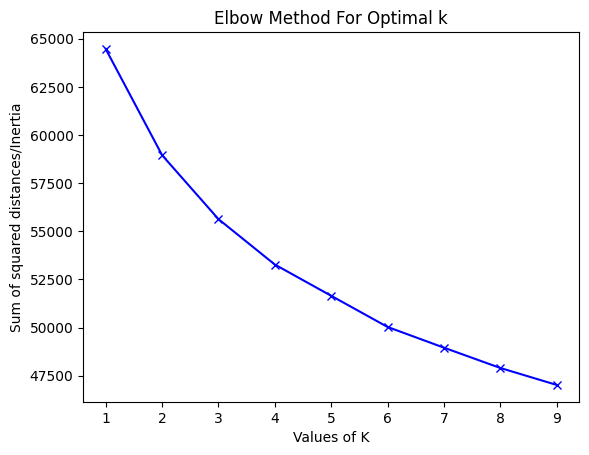

In [15]:
# Instantiate a list for sum of square distances and the variable K with a range from 1 to 10
Sum_of_squared_distances = []
K = range(1,10)

# Initiate a for loop that calculates kmeans on the scaled data and appends the values to the list instantiated earlier
for num_clusters in K :
 kmeans = KMeans(n_clusters = num_clusters, n_init = 10)
 kmeans.fit(scaled_features_df)
 Sum_of_squared_distances.append(kmeans.inertia_)

# Create a plot that utilizes the elbow method 
# (used to determine the optimal number of clusters for KMeans - the bend of the elbow)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow method shows that somewhere around 6 clusters would be ideal for this data, but let's look at the silhouettes to verify this.

For n_clusters = 2 The average silhouette_score is : 0.08604104062823023
For n_clusters = 3 The average silhouette_score is : 0.08571272799532173
For n_clusters = 4 The average silhouette_score is : 0.0757868653279241
For n_clusters = 5 The average silhouette_score is : 0.0822626428528214
For n_clusters = 6 The average silhouette_score is : 0.07461496213356167


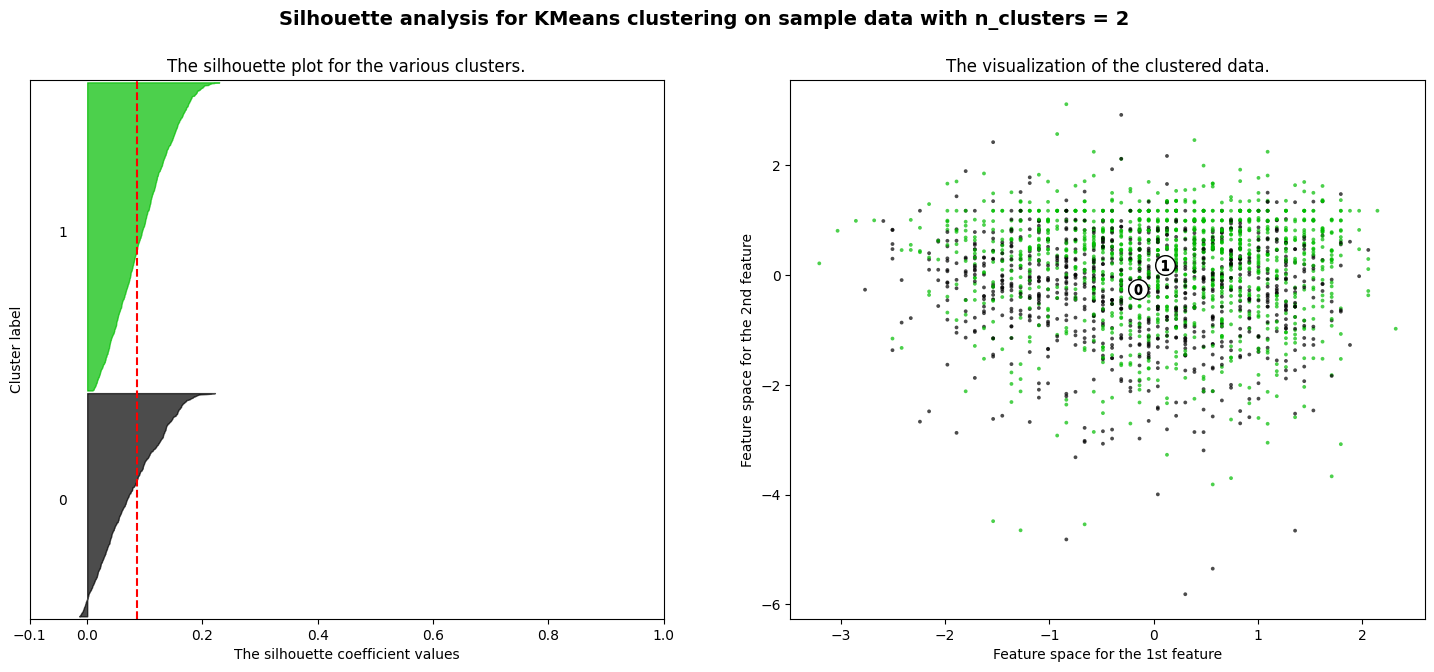

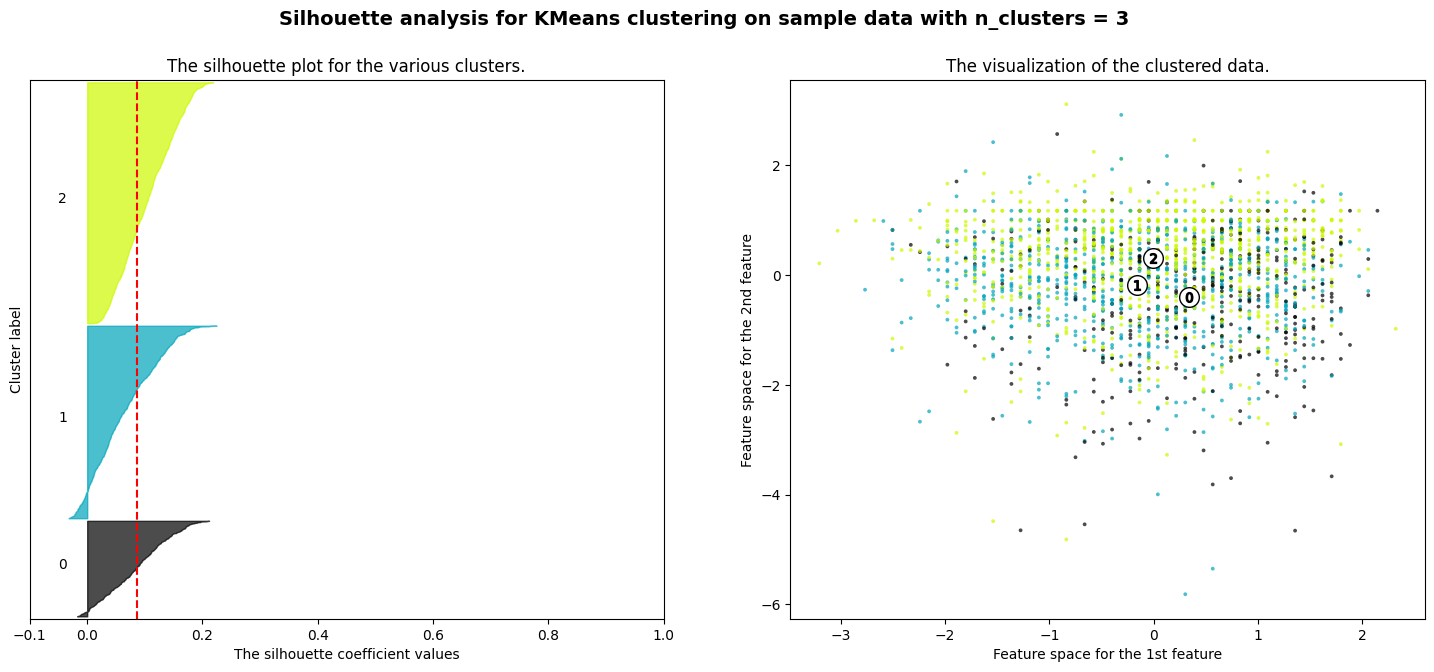

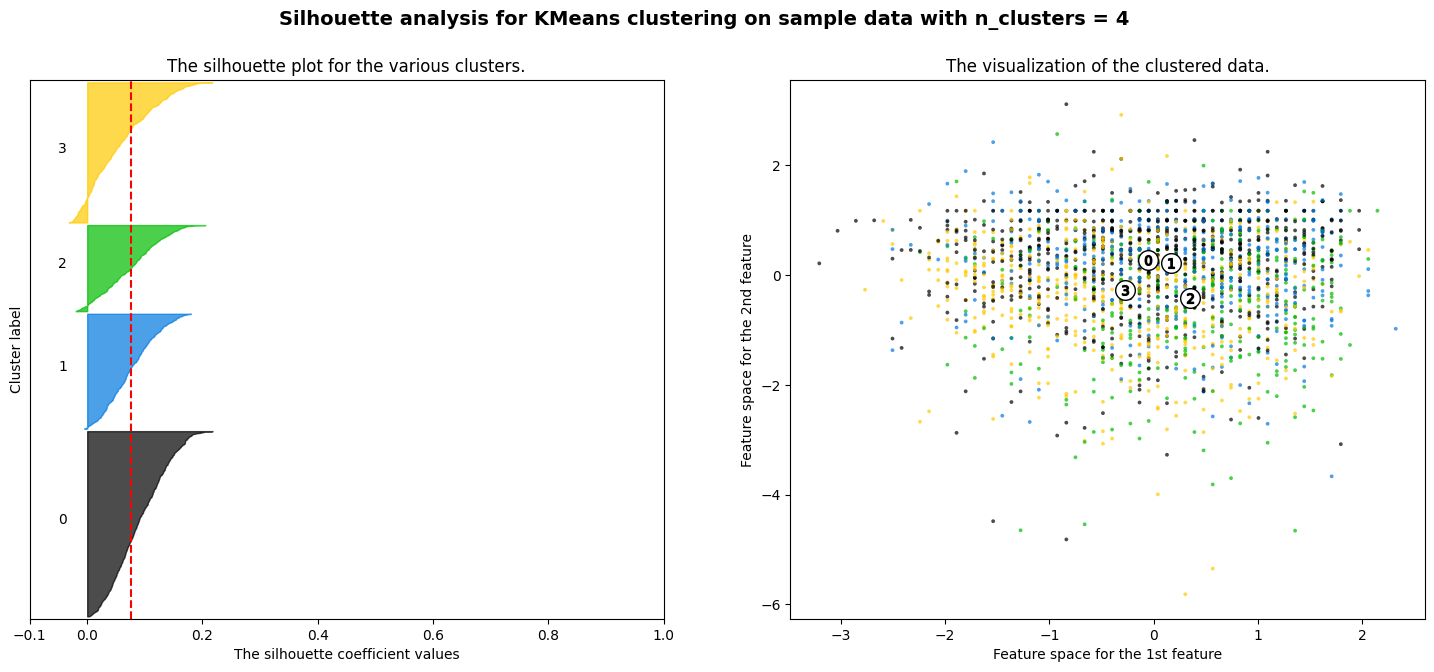

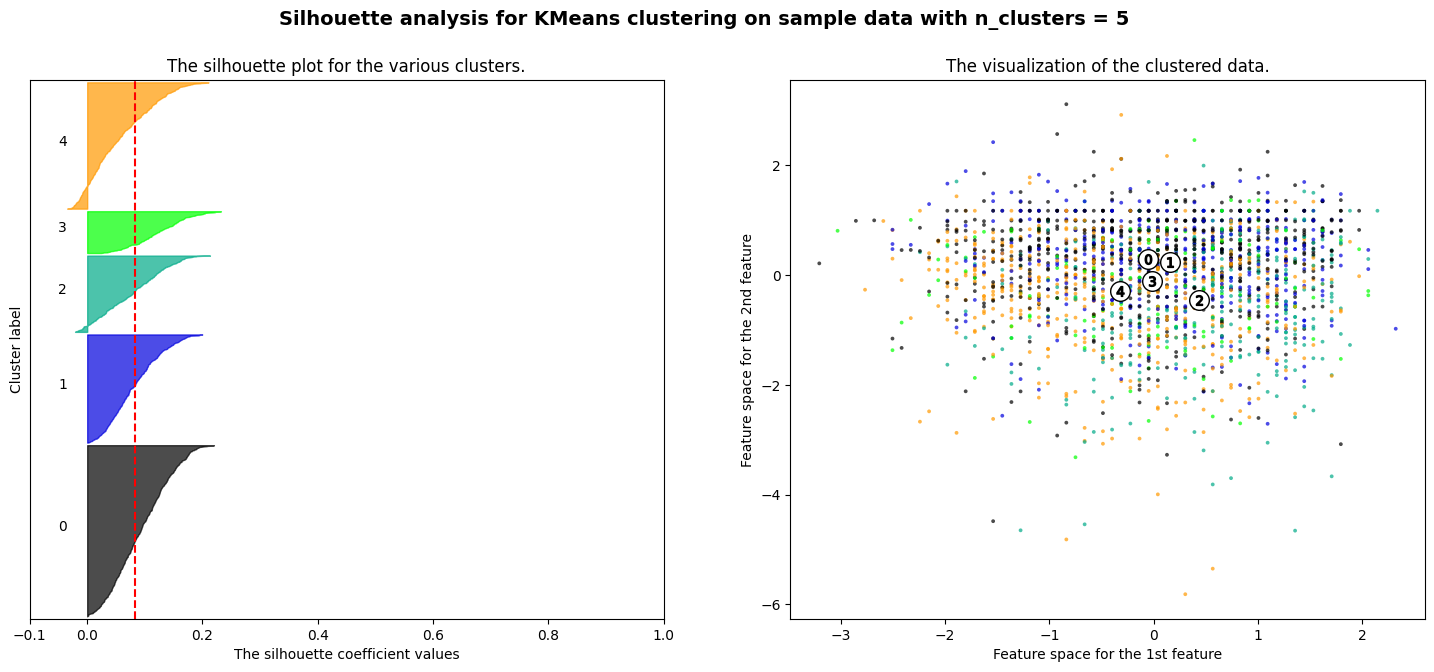

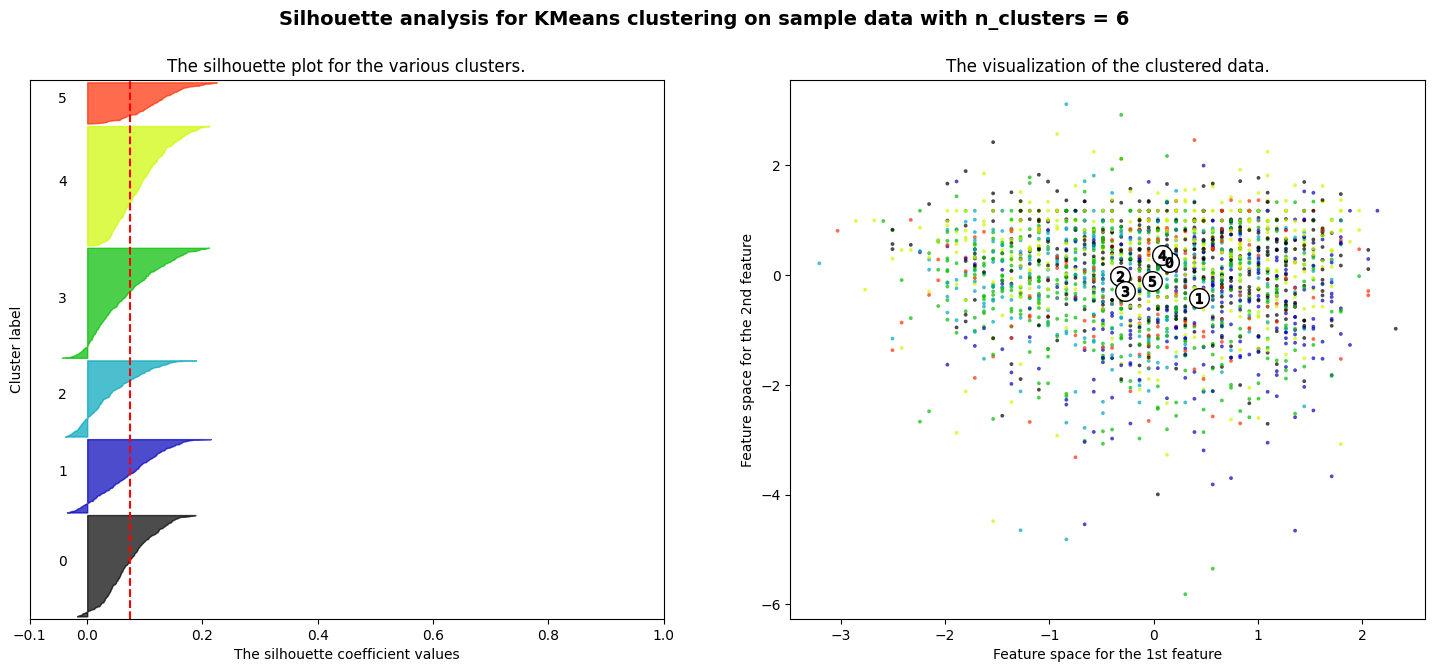

In [16]:
# Instantiate a list of numbers of clusters to try
range_n_clusters = [2, 3, 4, 5, 6]
# Instantiate an empty list for the clusters
silhouette_avg_n_clusters = []

# Initiate a for loop to run KMeans and determine the silhouettes
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly
    ax1.set_ylim([0, len(scaled_features_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, random_state = 42, n_init = 10)
    cluster_labels = clusterer.fit_predict(scaled_features_df)

    # The silhouette_score gives the average value for all the samples
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(scaled_features_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor = color, edgecolor = color, alpha = 0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
        # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_features_df.iloc[:, 0], scaled_features_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

4. Use the plot created in (3) to choose on optimal number of clusters for K-means

I've determined that 6 clusters will be the best for this data set. This can be seen above - the shapes of the silhouettes in the 6 cluster visualization are the most uniform (the widths are similar) and the points are not below the average line.

5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [17]:
# Initiate a kmeans model with 6 clusters
kmeans = KMeans(init = 'random', n_clusters = 6, n_init = 10, max_iter = 300, random_state = 42)
# Fit and transform the scaled data using kmeans
fitted_kmeans = kmeans.fit_transform(scaled_features_df)
# Use the kmeans model from above to make predictions about the clusters
predictions = kmeans.fit_predict(fitted_kmeans)

6. Fit a PCA transformation with two features to the scaled data.

In [18]:
# Initiate a PCA variable with 2 components (aka features from the data set)
pca = PCA(n_components = 2)
# Fit the pca to the scaled data
pca.fit(scaled_features)

PCA(n_components=2)

In [19]:
# Transform the scaled data using pca
scores_pca = pca.transform(scaled_features)

In [20]:
# Use the pca data in a KMeans model
kmeans_pca = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42, n_init = 10)
# Fit the data to the kmeans model from above
fitted_kmeans_pca = kmeans_pca.fit_transform(scores_pca)
# Make predictions for the pca kmeans model
pca_predictions = kmeans.fit_predict(fitted_kmeans_pca)

7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.

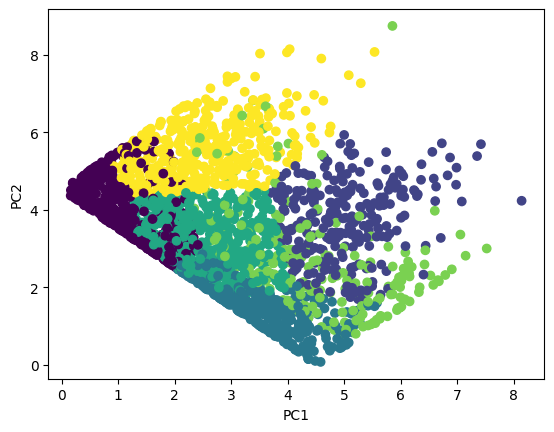

In [21]:
# Use matplotlib to create a scatterplot using the PCA KMeans data
plt.scatter(fitted_kmeans_pca[:,0], fitted_kmeans_pca[:,1], c = pca_predictions)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

8. Summarize your results and make a conclusion.

We can see from the scatterplot that the data have been divided into six clusters after PCA was performed and KMeans clustering done. The sixth cluster seems a little off. However, if we look below at the scatterplot created from the data predicted without PCA, we can see that the post-PCA scatterplot is more orthogonal (meaning the clusters are far more distinct from each other). This is what we want to happen, as it makes identifying which cluster a data point belongs in is far simpler.

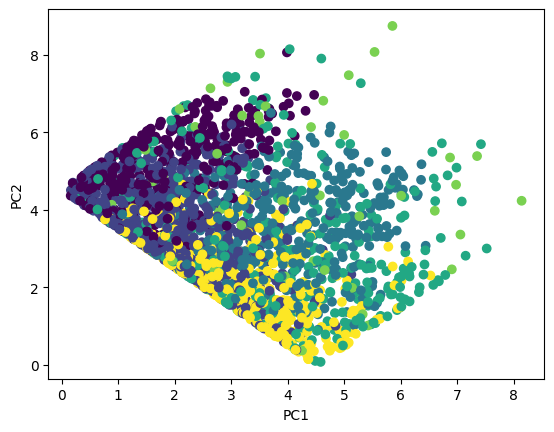

In [22]:
# Use matplotlib to create a scatterplot using the regular KMeans data
plt.scatter(fitted_kmeans_pca[:,0], fitted_kmeans_pca[:,1], c = predictions)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()